# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The data provides Math and Verbal SAT scores and well as participation rates across US states.  There appears to be one entry per state, we will assume the that entries are an average of scroes across states.  The data also contains a total of quantitative data.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

There are a total of 53 rows of data - 51 state entries, with column titles and totals of each column.  There does not appear to be any duplicated data or null values in the data set. We may need ro remove the row that includes total of dataset.

##### 3. Create a data dictionary for the dataset.

**Before Analysis**
- State: String
- Rate: String
- Verbal: String
- Math: String

**After Cleaning**
- State: String
- Rate: integer
- Verbal: integer
- Math: integer

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
%matplotlib inline

In [2]:
sat_scores = []
with open('/users/danieldemoray/ga-dsi-projects/projects-weekly/project-01/assets/sat_scores.csv', 'rU') as f:
    sat_scores = [x.strip().split(',') for x in f]

##### 5. Print the data

In [3]:
print sat_scores

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [4]:
labels = sat_scores[0] #splice sat_scores to contain only first and store this in labels list
data = sat_scores[1:] #splice remaining data to contain values outside of labels and store in data list
data.pop() #removes last item in data list, which contained "all" variable - sum of column data, which would skew analysis 
print labels
data 

['State', 'Rate', 'Verbal', 'Math']


[['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL', '12', '576', '589'],
 ['KY', '12', 

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [5]:
state_names = [i[0] for i in data] #returns first value of the row for each row in list data, adds to new list "state_names"

##### 8. Print the types of each column

In [6]:
print [type(x) for x in labels] # prints type of items in labels list
print [type(x) for x in data[0]] #prints type of each item in first row of data list.


[<type 'str'>, <type 'str'>, <type 'str'>, <type 'str'>]
[<type 'str'>, <type 'str'>, <type 'str'>, <type 'str'>]


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [7]:
#['State', 'Rate', 'Verbal', 'Math']
ratelist = [int(i[1]) for i in data]
verballist = [int(i[2]) for i in data]
mathlist = [int(i[3]) for i in data]
# created separate lists for each column and set items equal to type int.

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [8]:
#created three dictionaries by using dict() and zipping state_names to each list made above
stateRate = dict(zip(state_names, ratelist))
stateVerbal = dict(zip(state_names, verballist))
stateMath = dict(zip(state_names, mathlist))

##### 11. Create a dictionary with the values for each of the numeric columns

In [9]:
newdata = [x[1:] for x in data] #pulls quantitative data from existing data list and stores in newdata

number_data = {} #create an array using numpy to store columns[1:] of data array
number_labels = labels[1:] #removes 'State' label from labels to wllow to create dictionary for quantative items

newdata = np.array(newdata, dtype = np.int64) #creates a dictionary of values for each of the numeric columns
newdata = newdata.T
for i in range(len(number_labels)):
    number_data[number_labels[i]] = newdata[i]
number_data

{'Math': array([510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499,
        489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515,
        542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580,
        554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551]),
 'Rate': array([82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56,
        55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12,
        12, 11, 11,  9,  9,  9,  8,  8,  8,  7,  6,  6,  5,  5,  4,  4,  4]),
 'Verbal': array([509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493,
        491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509,
        539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577,
        559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566])}

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [10]:
print 'Math'
print 'min:', min(number_data['Math'])
print 'max:', max(number_data['Math'])
print 'mean:', np.mean(number_data['Math'])

print 'Rate'
print 'min:', min(number_data['Rate'])
print 'max:', max(number_data['Rate'])
print 'mean:', np.mean(number_data['Rate'])

print 'Verbal'
print 'min:', min(number_data['Verbal'])
print 'max:', max(number_data['Verbal'])
print 'mean:', np.mean(number_data['Verbal'])

Math
min: 439
max: 603
mean: 531.843137255
Rate
min: 4
max: 82
mean: 37.0
Verbal
min: 482
max: 593
mean: 532.529411765


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [11]:
#this computes the standard deviation using numpy.
print 'Rate'
print 'Standard Deviation: ', np.std(number_data['Rate'])
print 'Math'
print 'Standard Deviation: ', np.std(number_data['Math'])
print 'Verbal'
print 'Standard Deviation: ', np.std(number_data['Verbal'])

Rate
Standard Deviation:  27.2792386761
Math
Standard Deviation:  35.9298731731
Verbal
Standard Deviation:  33.0319826842


In [146]:
#this computes the standard deviation without numpy, but does not do so 
#using list comprehension.  This code comes from in-class exercise stats-functions-solution
import math

def computeVariance(list):
    avg = 0
    for i in list:
        avg=avg+i
    avg=float(avg)/len(list)
    
    var=0
    for i in list:
        var=var+(i-avg)**2
    var=var/len(list)
    return var

def std_deviation(list):
    variance = computeVariance(list)
    std=math.sqrt(variance)
    return std
print 'Standard deviation of Rate is: ', std_deviation(number_data['Rate'])
print 'Standard deviation of Math is: ',std_deviation(number_data['Math'])
print 'Standard deviation of Verbal is: ',std_deviation(number_data['Verbal'])

Standard deviation of Rate is:  27.2792386761
Standard deviation of Math is:  35.9298731731
Standard deviation of Verbal is:  33.0319826842


^^Above standard deviations for each numeric column are high.  This suggests values are spread out.

## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

(array([ 0.04022122,  0.01508296,  0.00502765,  0.00754148,  0.        ,
         0.        ,  0.02262443,  0.0100553 ,  0.01759678,  0.0100553 ]),
 array([  4. ,  11.8,  19.6,  27.4,  35.2,  43. ,  50.8,  58.6,  66.4,
         74.2,  82. ]),
 <a list of 10 Patch objects>)

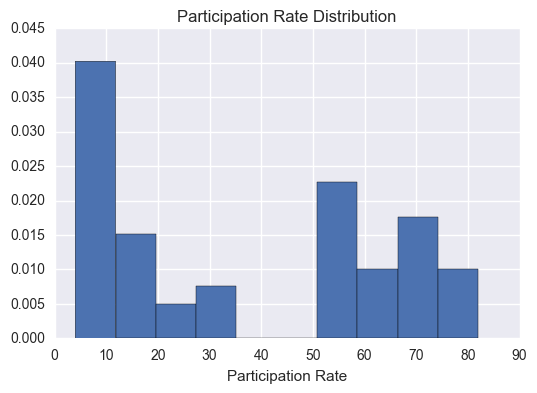

In [12]:
#source = https://bespokeblog.wordpress.com/2011/07/11/basic-data-plotting-with-matplotlib-part-3-histograms/
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Participation Rate Distribution')
plt.xlabel('Participation Rate')

plt.hist(ratelist, normed = 1)

##### 15. Plot the Math distribution

(array([ 0.0011956,  0.       ,  0.0023912,  0.011956 ,  0.0143472,
         0.0035868,  0.0107604,  0.005978 ,  0.0047824,  0.005978 ]),
 array([ 439. ,  455.4,  471.8,  488.2,  504.6,  521. ,  537.4,  553.8,
         570.2,  586.6,  603. ]),
 <a list of 10 Patch objects>)

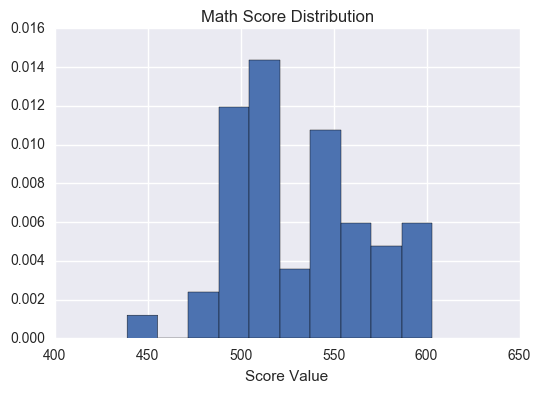

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Math Score Distribution')
plt.xlabel('Score Value')


plt.hist(mathlist, normed = 1)

##### 16. Plot the Verbal distribution

(array([ 0.01059883,  0.01413178,  0.01413178,  0.00529942,  0.00529942,
         0.00706589,  0.00529942,  0.01236531,  0.01059883,  0.00529942]),
 array([ 482. ,  493.1,  504.2,  515.3,  526.4,  537.5,  548.6,  559.7,
         570.8,  581.9,  593. ]),
 <a list of 10 Patch objects>)

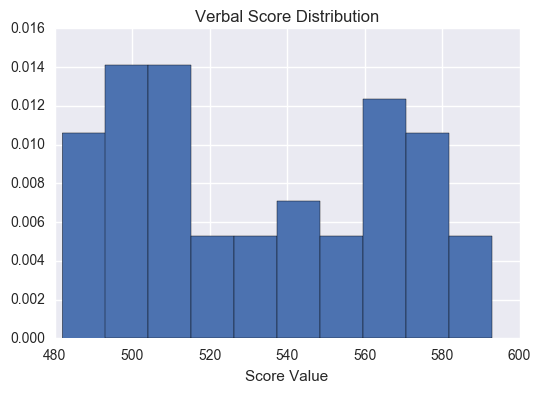

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Verbal Score Distribution')
plt.xlabel('Score Value')

plt.hist(verballist, normed = 1)

##### 17. What is the typical assumption for data distribution?

Gaussian Distribution.  Bell Curve also referred to as normal distrubution - we would expet most values (around 68%) in a list to be close to the mean.

##### 18. Does that distribution hold true for our data?

No, all three histograms suggest that our data does not have a normal distribution.  These visualization confirm what we saw in previous standard deviation calculations.  Data points in each numeric list are not centered around the mean.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

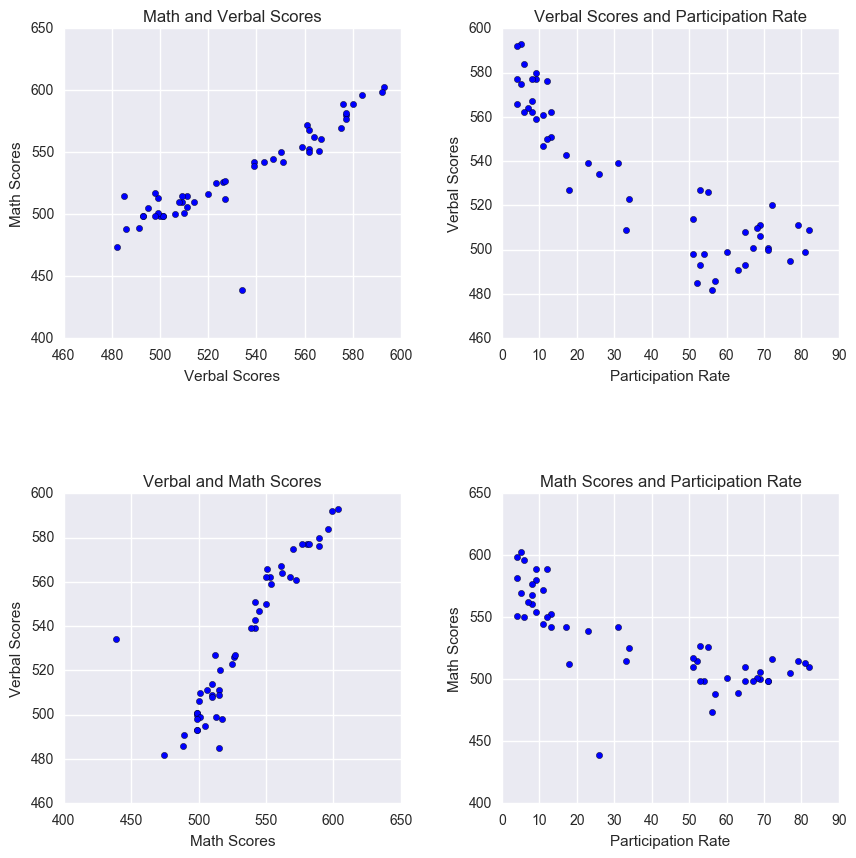

In [13]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
fig.subplots_adjust(wspace = 0.3, hspace = 0.5)

x1=verballist
x2=mathlist
x3=ratelist
x4=state_names
axes[0,0].scatter(x1, x2, label = 'Math and Verbal Scores')
axes[0,0].set_title('Math and Verbal Scores')
axes[0,0].set_xlabel("Verbal Scores")
axes[0,0].set_ylabel('Math Scores')
axes[0,1].scatter(x3, x1, label = 'Verbal Scores and Participation Rate')
axes[0,1].set_title('Verbal Scores and Participation Rate')
axes[0,1].set_xlabel("Participation Rate")
axes[0,1].set_ylabel('Verbal Scores')
axes[1,0].scatter(x2, x1, label = 'Verbal and Math Scores')
axes[1,0].set_title('Verbal and Math Scores')
axes[1,0].set_xlabel("Math Scores")
axes[1,0].set_ylabel('Verbal Scores')
axes[1,1].scatter(x3, x2, label = 'Math Scores and Participation Rate')
axes[1,1].set_title('Math Scores and Participation Rate')
axes[1,1].set_xlabel("Participation Rate")
axes[1,1].set_ylabel('Math Scores')


##### 20. Are there any interesting relationships to note?

- In **quadrants two and three** we see that there is a positive correlation between verbal scores and math scores.
If we were to apply a trendline in both quadrants - the slope would be more pronounced in quadrant three.

- In **quadrants one and four** we look at the math & verbal scores against participation rates across US states.  It seems there is a negative correlation between increased participation rates and scores on exams. (IE the higher the participation rate the lower the overall score)



##### 21. Create box plots for each variable. 

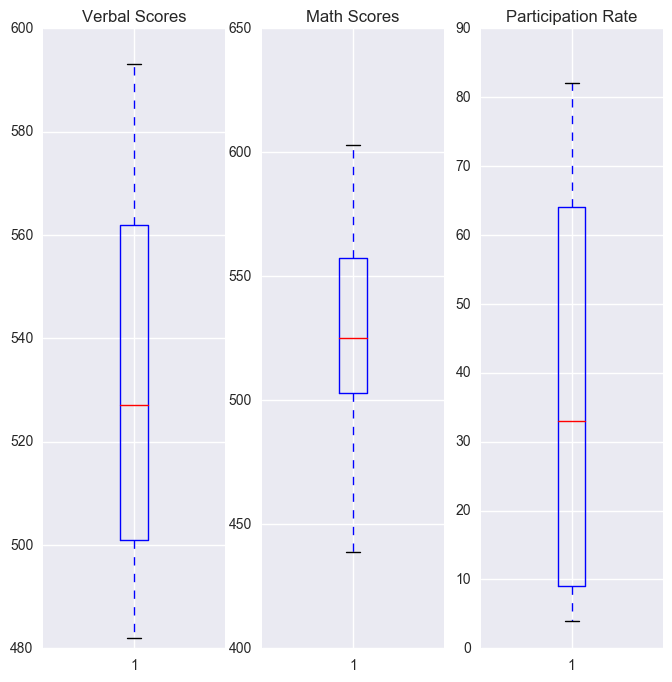

In [14]:
fig, axes = plt.subplots(1,3, figsize=(8,8))
axes[0].boxplot(verballist)
axes[0].set_title('Verbal Scores')
axes[1].boxplot(mathlist)
axes[1].set_title('Math Scores')
axes[2].boxplot(ratelist)
axes[2].set_title('Participation Rate')

- These three boxplots serve to visualize spread of data in each of the three numeric lists we are evaluating.  The median of each data set is marked by the red line.  The values around the median are separated into four buckets each representing 25% of all values.
- These boxplots confirm what we have verified in our above analysis.  Not only do the values not fall on the standard distrubution, the range of the data is large for each numeric column.

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

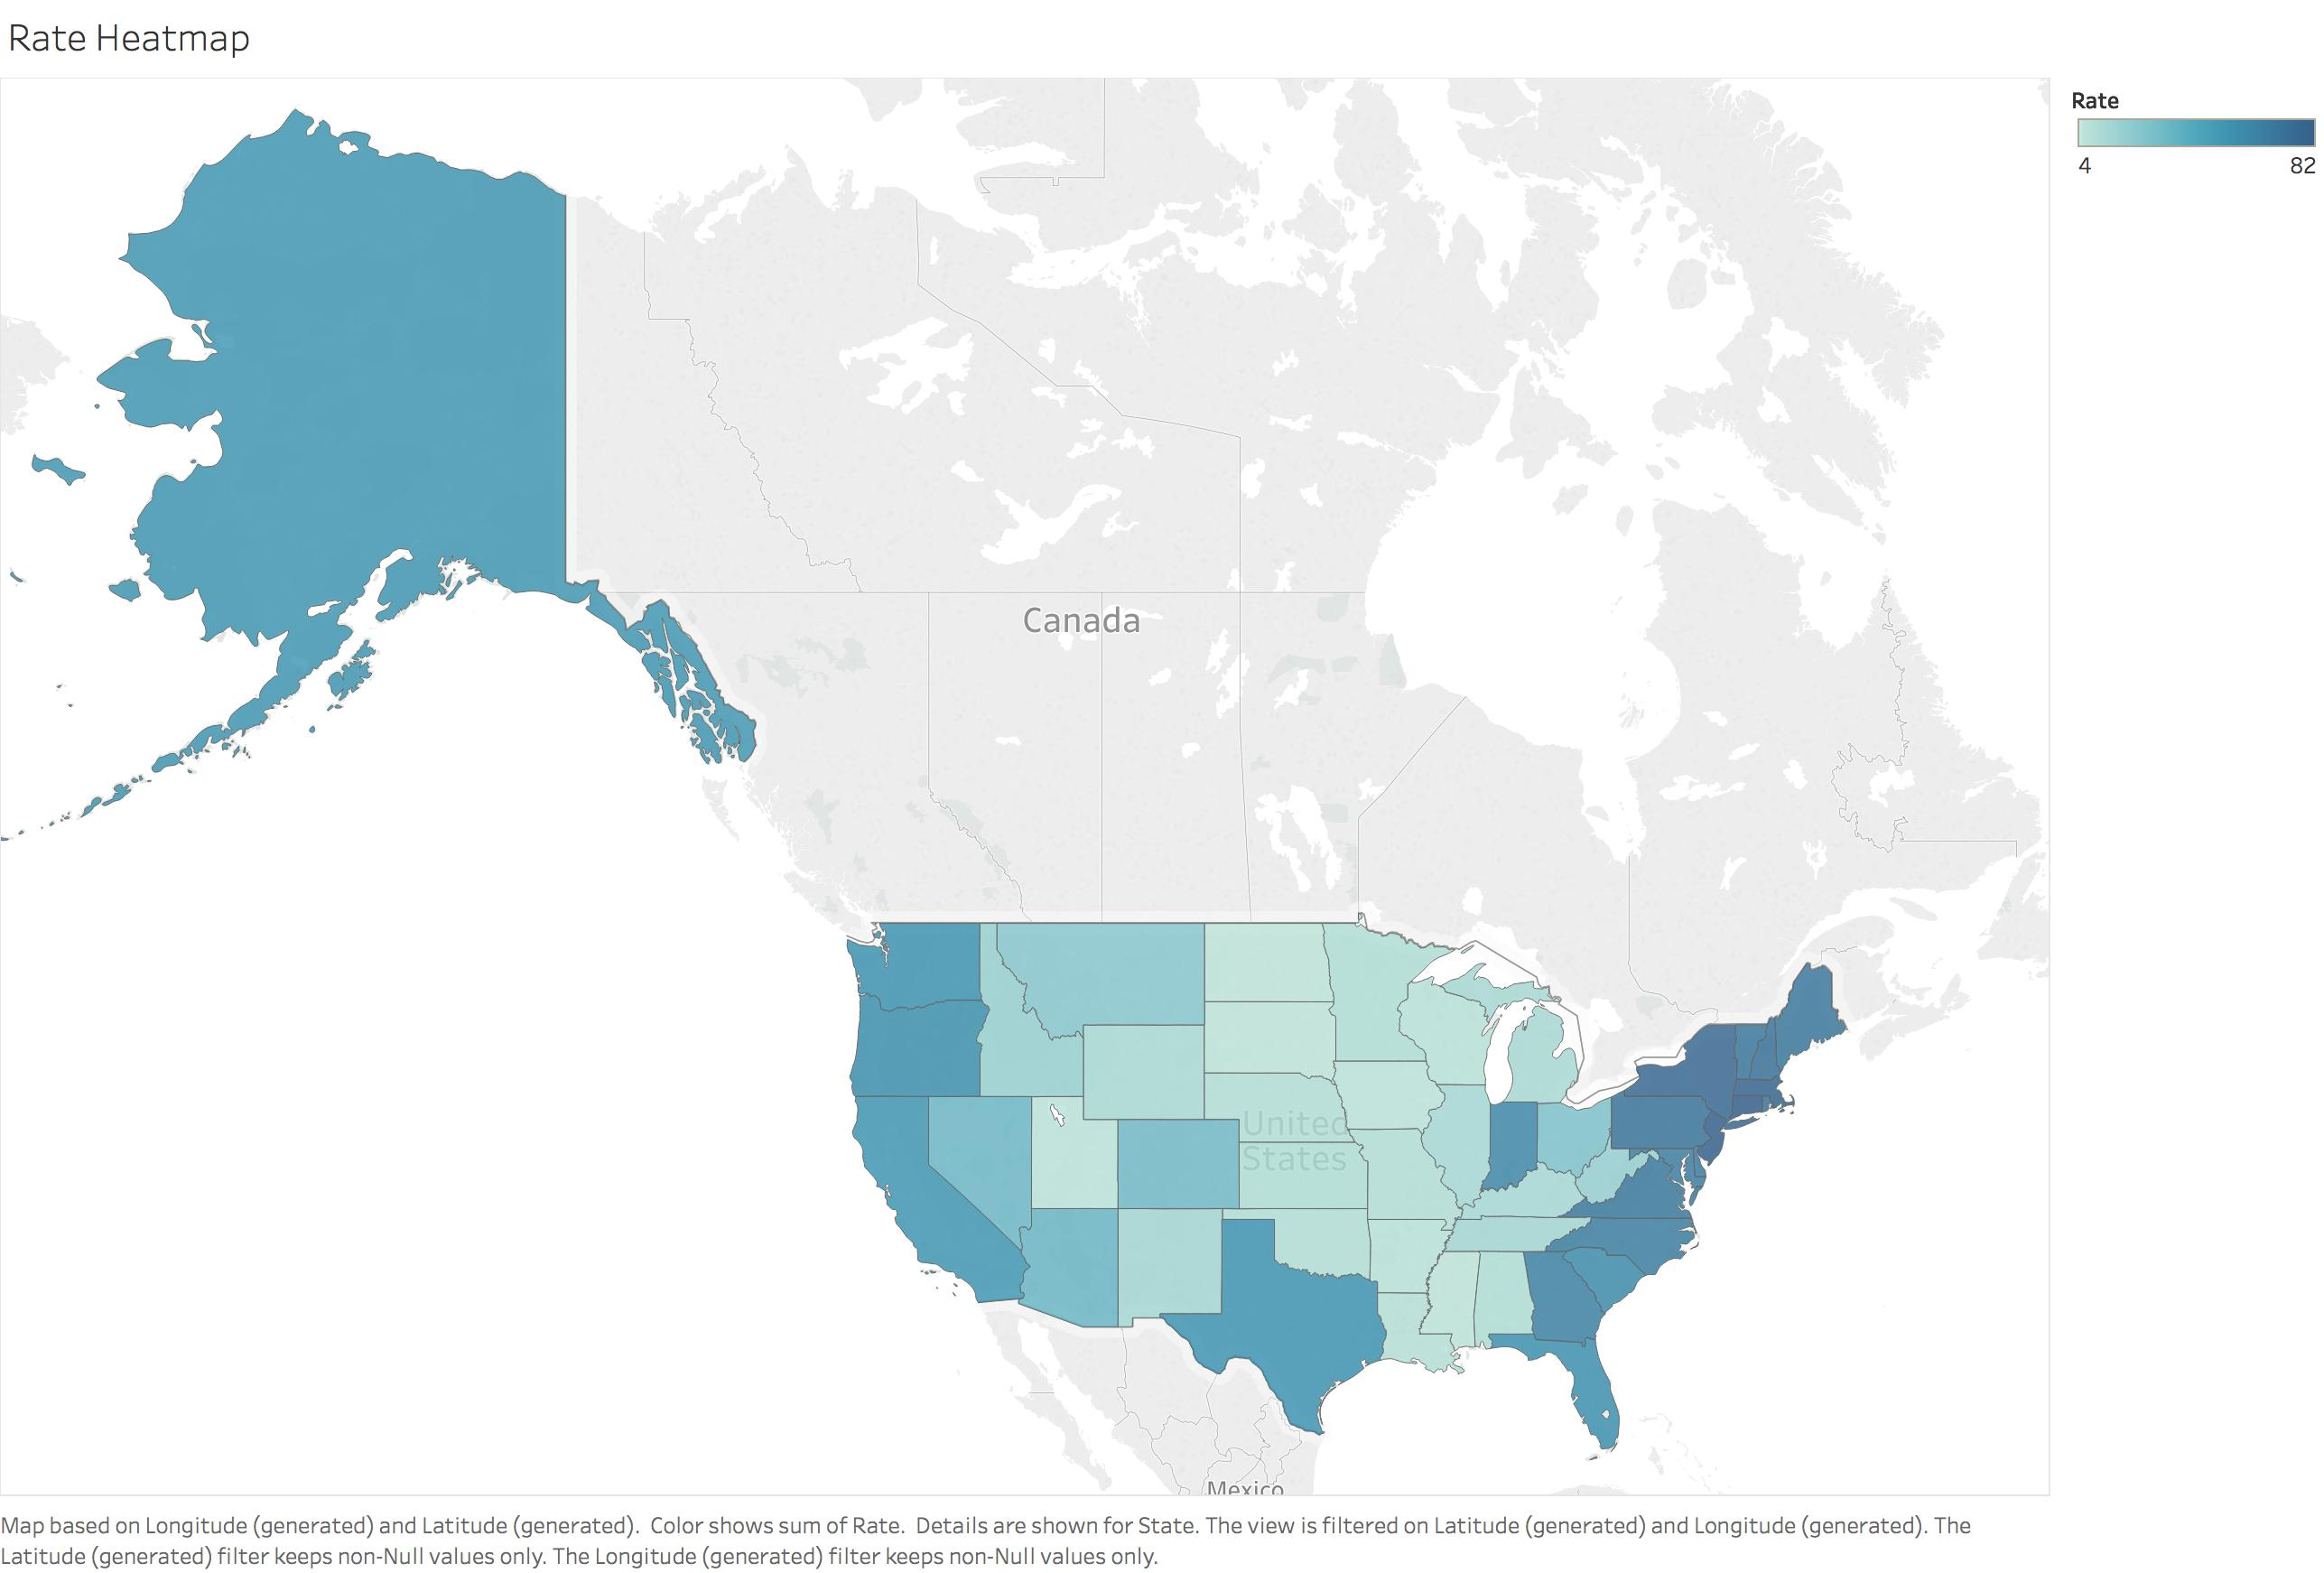

In [15]:
from IPython.display import Image
Image(filename='../assets/rateheatmap.jpg') 

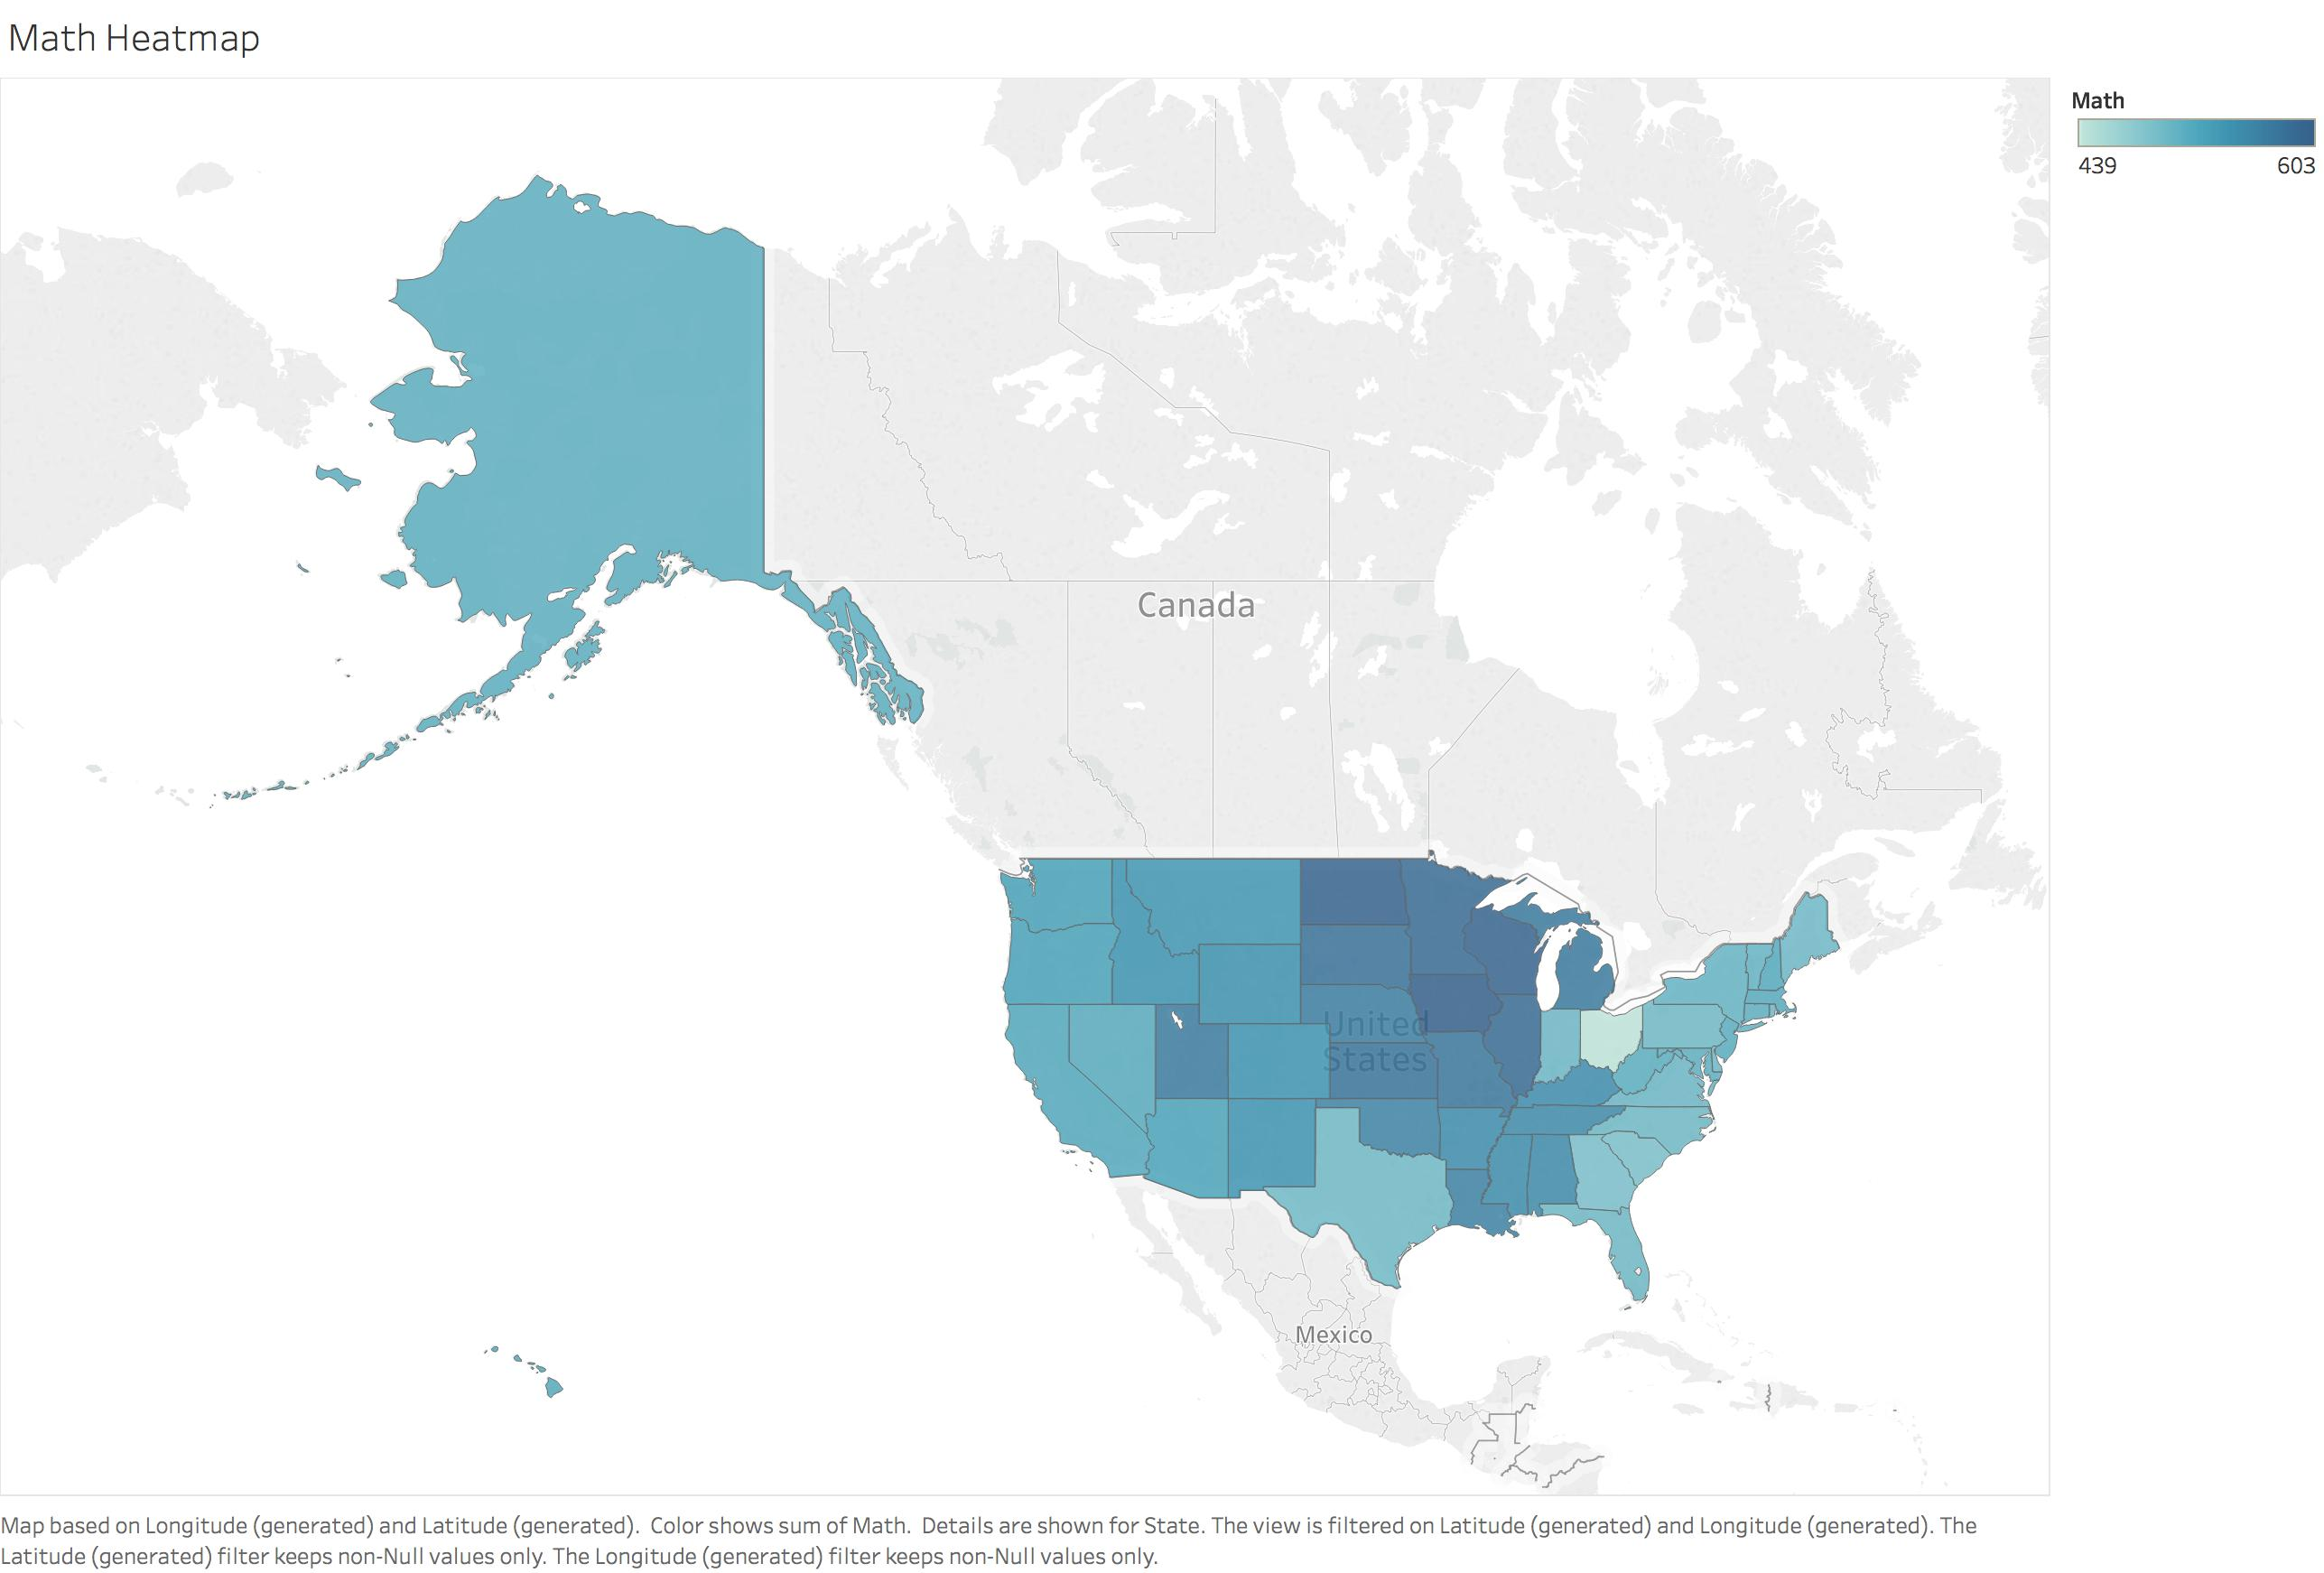

In [118]:
from IPython.display import Image
Image(filename='../assets/mathheatmap.jpg') 


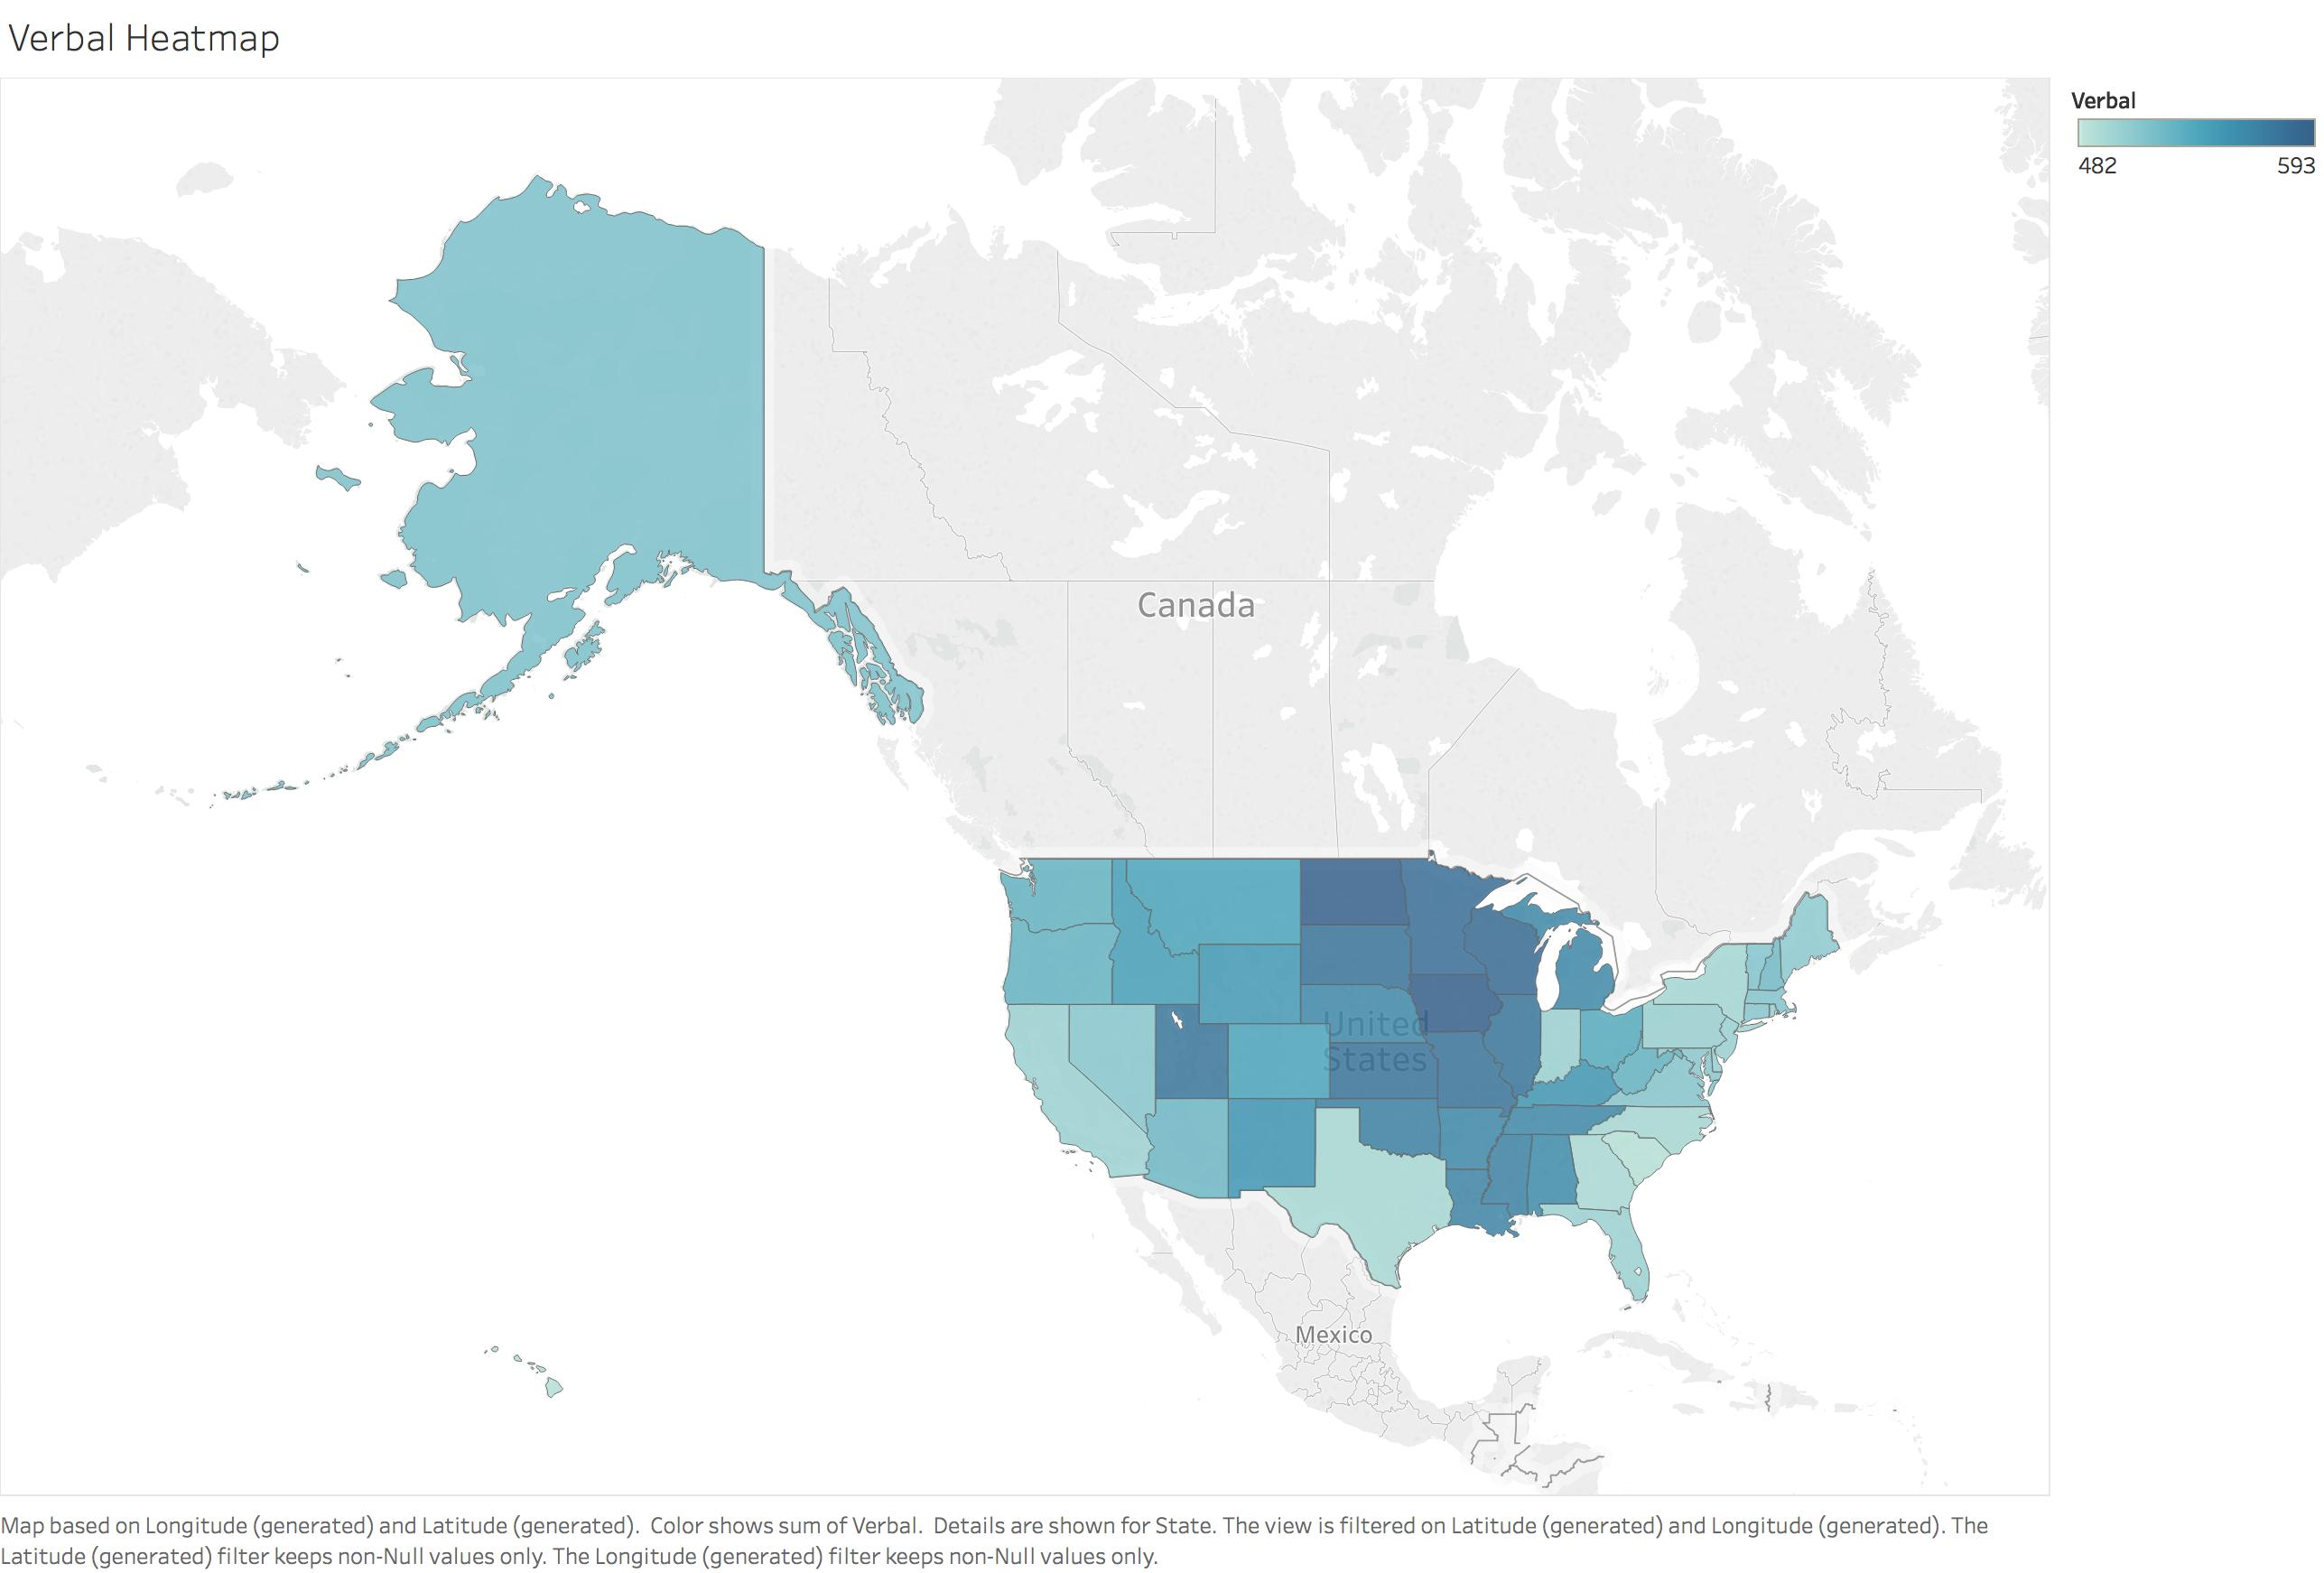

In [119]:
from IPython.display import Image
Image(filename='../assets/verbalheatmap.jpg') 